# Elizabeth Daly
# HDip Data Analytics 2020
## Machine Learning & Statistics Project
***

For the module project we must create a web service that uses machine learning to make predictions of wind turbine power output from wind speed values. The web service should respond with predicted power values based on wind speed values sent as HTTP requests. A Dockerfile will be used to build and run the web service in a container. 

The very first thing to do is to import required packages.

In [1]:
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration
Import the **powerproduction** dataset provided and have a look at it.

In [2]:
# File provided as a txt file. I saved it as a csv file.
df = pd.read_csv("data\powerproduction.csv")

# Size?
shape = df.shape
print("Data frame shape", shape, "r,c")

# Check for NaNs, missing values etc
print(df.count())

Data frame shape (500, 2) r,c
speed    500
power    500
dtype: int64


In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The raw data contains a column of wind speed values (in increasing order of wind speed) and a column of associated power values. Looks like the first and last 5 lines contain zeros for power. Is this just a fluke? There's probably a reason for it: one can't generate power with low wind speeds and perhaps one can't operate the turbines at very high wind speeds? Check by printing more of the head of file. No units have been provided with the data, so I will assume units of wind speed are m/s, and those of power are kilowatts (kW).

In [4]:
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [5]:
# Look at some quick descriptive statistics of the numeric data.
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


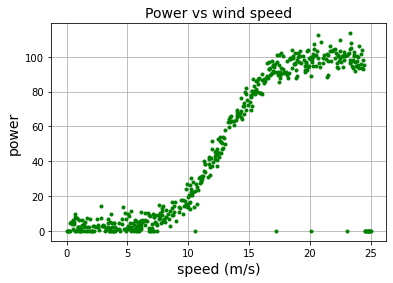

In [6]:
# Try plotting power as a function of wind speed to check for any obvious relationship between them.
plt.plot(df['speed'], df['power'],  '.g')
plt.title('Power vs wind speed', fontsize='14')
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power', fontsize='14')
plt.grid()

Clearly there isn't a simple relationship between power and speed. It looks as if little power is generated until some threshold speed is achieved (about 7), then it increases nearly linearly in a range of wind speeds (10 - 15), before saturating above a certain wind speed (about 17). The plot would suggest there is a range of wind speeds where the power depends almost linearly on wind speed. There are very occasional zero values for power at higher wind speeds - just anomalies or blips in the data I think.

Is this the curve we should expect? I think so. The theoretical dependence of power on wind speed has a curve which is very similar; for example, see Figure 2 in <span style='color:red'> [WT curve] </span>. Explain what's happening in different regimes. Units etc.

Look at the distribution of wind speeds. Why? Our assignment in the Programming for Data Analysis module involved looking at the numpy.random package <span style='color:red'> [np random] </span>. I learned that under certain conditions, wind speed has a Rayleigh distribution, which is not symmetrical. I wonder if the samples in our dataset follow a such distribution? The mean and variance of this distribution are calculated from the scale factor: $\mu = \sqrt{\pi / 2} s$ and $\sigma^2 = (4 - \pi)/2 s^2$. This results in $\mu \approx 1.25 s$ and $\sigma^2 \approx 0.43 s$. From the descriptive statistics above we know that the mean wind speed is 12.6 m/s, so the scale factor to use is $s = \mu/1.25 \approx 10$.

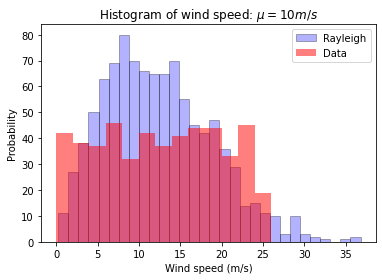

In [7]:
# Wind speeds sampled from a Rayleigh distribution, mean=12.6 m/s
# Default: numpy.random.rayleigh(scale=1.0, size=None)
data = np.random.rayleigh(10, 1000) 
plt.hist(data, bins=30, alpha = 0.3, facecolor='blue', edgecolor='black', label=['Rayleigh'])

bins = np.arange(0, 30, 2) # fixed bin size
plt.hist(df['speed'], bins=bins, alpha=0.5, facecolor='red', label=['Data'])

plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability')
plt.title('Histogram of wind speed: $\mu=10 m/s$')
plt.legend()

Well, that was a dead end. Clearly the wind speeds provided do not follow a Rayleigh distribution, rather roughly a uniform distribution.

## Procedure
<span style='color:red'> [Geron] </span> and <span style='color:red'> [CourseML] </span>

## References
<span style='color:red'> [Geron] </span> Aurelien Geron, *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow*, **2019**, 2nd Edition, O'Reilly Media, Inc., CA

<span style='color:red'> [CourseML] </span> Andrew Ng, Coursera Machine Learning offered by Stanford, https://www.coursera.org/learn/machine-learning, (Completed & certified Sept. 2020). 

<span style='color:red'> [np random] </span> numpy.random.rayleigh, NumPy v1.19 Manual, https://numpy.org/doc/stable/reference/random/generated/numpy.random.rayleigh.html

<span style='color:red'> [WT FAQ] </span> Wind Turbine FAQ, ENERPOWER Total Energy Solutions, https://enerpower.ie/portfolio/wind-turbine-faq-ireland/, (Accessed 21 Oct. 2020).

<span style='color:red'> [WT calc] </span> Wind Turbine Power Calculations, RWE npower renewables, https://docplayer.net/17802133-Wind-turbine-power-calculations.html, (Accessed 21 Oct. 2020).

<span style='color:red'> [WT curve] </span> Wind Energy Basics, New York Wind Energy Guide for Local Decision Makers, www.nyserda.ny.gov/-/media/Files/Publications/Research/Biomass-Solar-Wind/NY-Wind-Energy-Guide-1.pdf, (Accessed 9 Nov. 2020).

<span style='color:red'> [] </span>


Notes:
- describe power curve
- supervised learning as have training set
- feature selection, only one here
- what about feature scaling etc
- algs to use for this problem?
- how to measure perf? Test & validation. 